In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/Ecommerce Customers.csv")

In [3]:
data.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [137]:
data.shape

(500, 8)

## Exploratory data analysis

In [5]:
plt.style.use('fivethirtyeight')

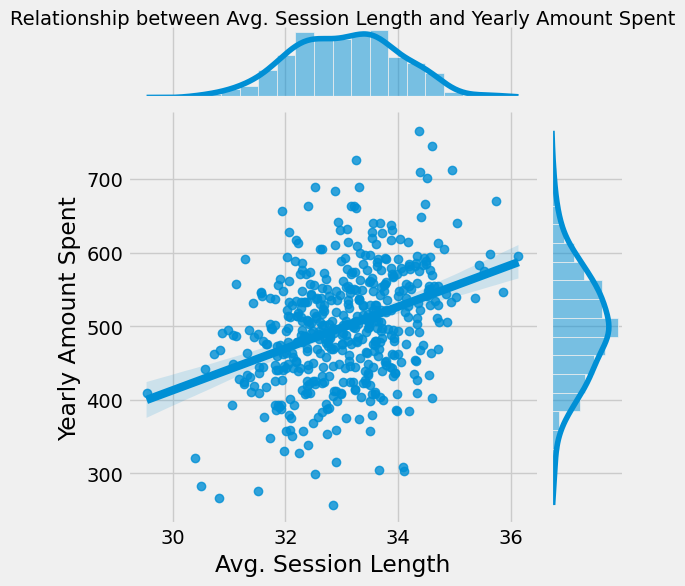

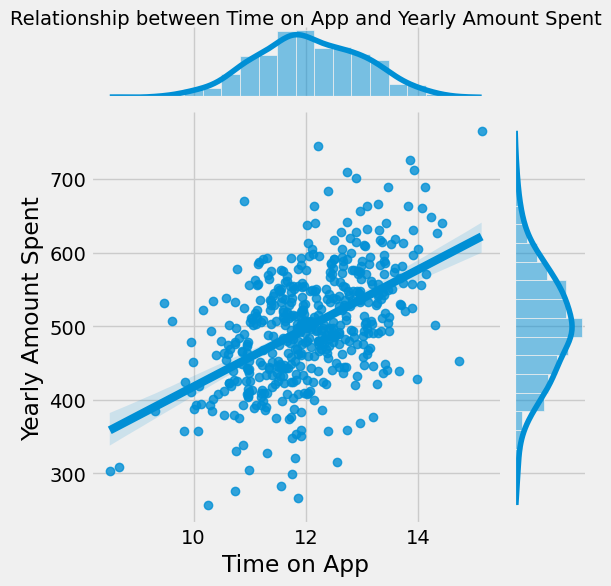

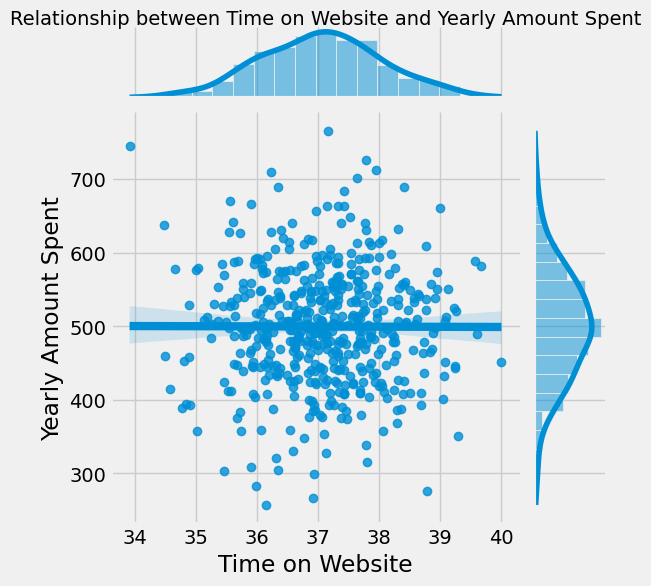

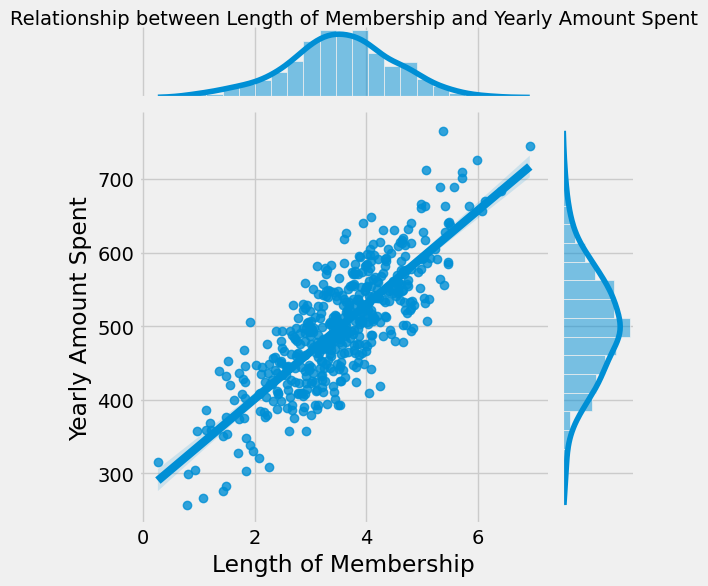

In [6]:
target = 'Yearly Amount Spent'
features = data.drop(columns=target).select_dtypes(include='number').columns
histo = data.select_dtypes(include='number').columns
for feature in features:
    sns.jointplot(x=feature, y=target, data=data, kind='reg')
    plt.suptitle(f'Relationship between {feature} and {target}', fontsize=14)
    plt.subplots_adjust(top=0.95)
    plt.show()

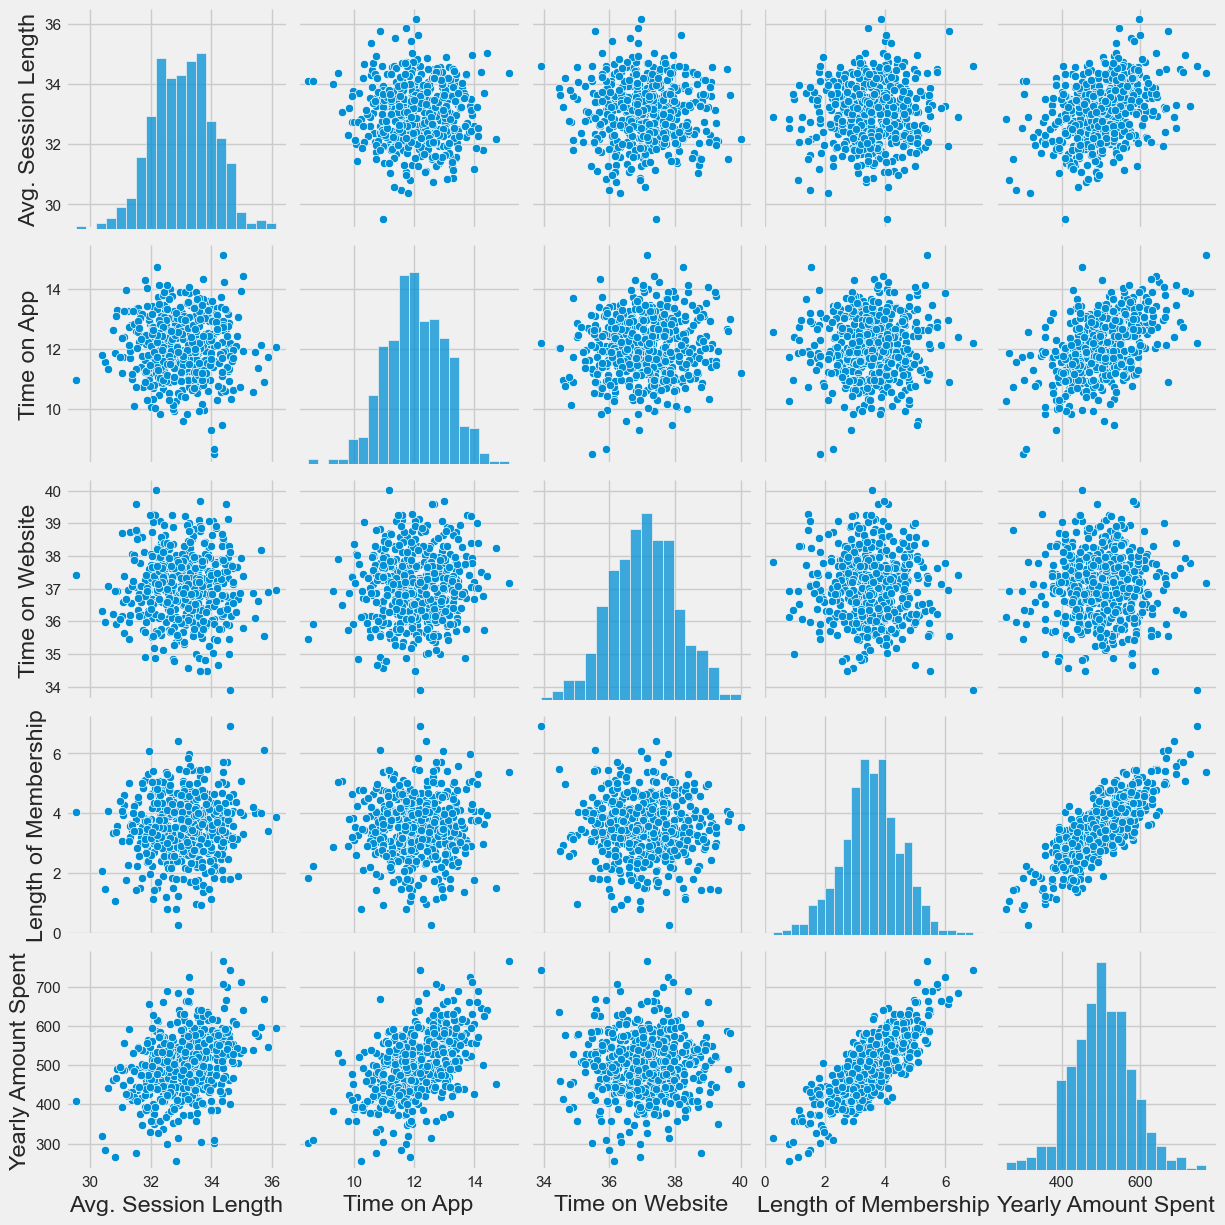

In [140]:
sns.pairplot(data)

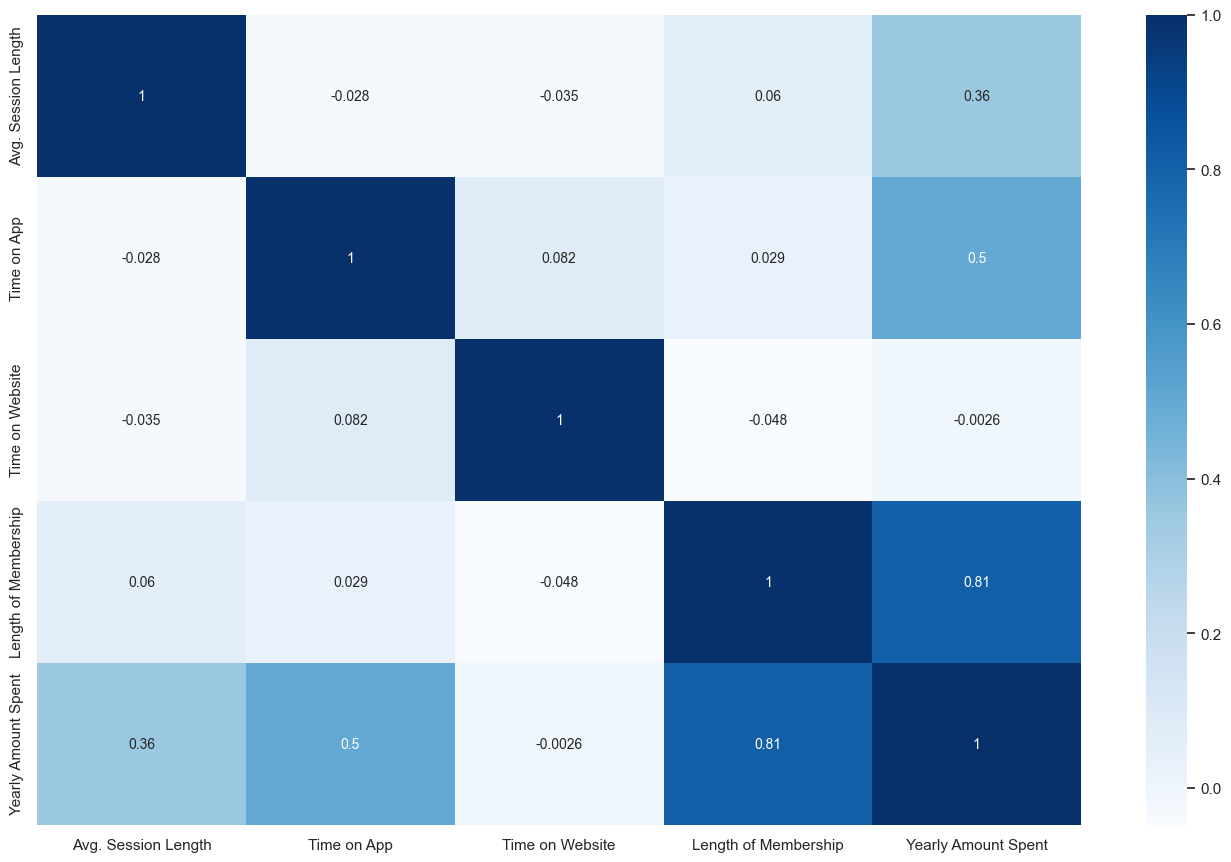

In [141]:
# Heatmap
#Pearson correlation
sns.set(rc={'figure.figsize': (15,10)})
pc = data[histo].corr(method='pearson')

cols = histo

ax = sns.heatmap(pc, annot=True, yticklabels=cols,xticklabels=cols,annot_kws={'size':10}, cmap='Blues')

- Comparing Each Feature againts Yearly Amount Spent being the target variable. There is a positve correlation between Yearly Amount Spent and Avg. Session Length, Time on App and a very strong positive correlation with Length of membership.
- There is no clear relationship between Yearly Amount Spent and Time on Website.

### SPLITTING THE DATA FOR TRAINING AND TESTING

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1)
X_columns = data.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1)
y = data[target]

In [10]:
#first
X_dev, X_test, y_dev, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

print(X_dev.shape)
print(y_dev.shape)
print(X_test.shape)
print(y_test.shape)






(400, 4)
(400,)
(100, 4)
(100,)


In [ ]:
#Training the model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_dev,y_dev)

LinearRegression()

- Coefficients of the trained model

In [15]:
lm.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [16]:
cdf= pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
cdf

,Coef
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


- From the coefficients above, Length of Membership has a significant impact on our model, followed by Time on App then Average session Length.
- Time on website has close to no significance on the model.

### Predictions

In [18]:
pred = lm.predict(X_dev)

In [19]:
predictions = lm.predict(X_test)
predictions

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

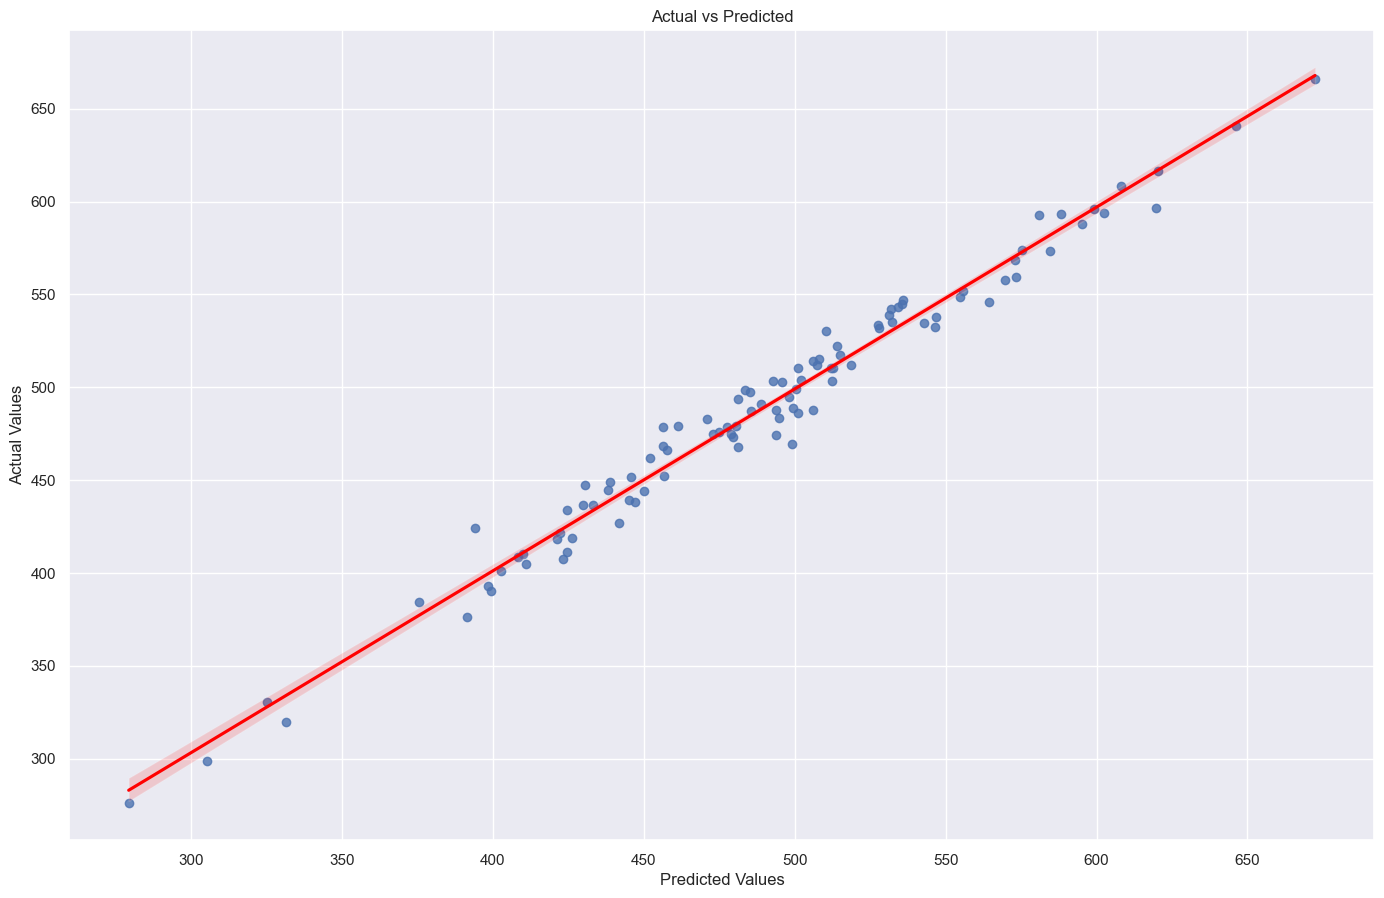

In [125]:
# sns.scatterplot(x=predictions, y=y_test)
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.show()


# Plot with regression line
sns.regplot(x=predictions, y=y_test, line_kws={"color": "red"})

plt.title('Actual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

- There seems to be some straight line from the above scatterplot indicating that our model is fit for purpose

### Evaluation

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
import math

In [24]:
print("Accuracy: ",lm.score(X_test,y_test) )
print("The mean absolute error: ", mean_absolute_error(y_test, predictions))
print("The mean squared error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Accuracy:  0.9778130629184126
The mean absolute error:  8.558441885315247
The mean squared error:  109.86374118394002
RMSE:  10.481590584636477


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)

reg.fit(X_dev, y_dev)

y_pred = reg.predict(X_dev)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', reg.score(X_test,y_test))
print('The RMSE on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy on the testing dataset is:  0.9561886143375021
The RMSE on the testing dataset is:  14.72895755635569
The MAE on the testing dataset is:  11.802889075117653


- The Linear model outperforms the GradientBoostingRegressor

In [33]:
# # Joining the Original data with predictions
# final_d = pd.DataFrame(X_dev, columns = X_columns.columns)
# final_d['Yearly Amount Spent'] = y_train.values
# final_d['Phase'] = 'Existing data'
# final_d['Yearly Amount Spent Predictions'] = pred
# print(final_d.shape)


# # Fixing the test df
# final_d2 = pd.DataFrame(X_test, columns = X_columns.columns)
# final_d2['price'] = y_test.values
# final_d2['Phase'] = 'New Unseen data'
# final_d2['Price Predictions'] = reg.predict(X_test)
# print(final_d2.shape)



# Rebuild DataFrames with correct indices (no index reset!)
final_d = X_dev.copy()
final_d['Yearly Amount Spent'] = y_dev
final_d['Phase'] = 'Existing data'
final_d['Price Predictions'] = pred

final_d2 = X_test.copy()
final_d2['Yearly Amount Spent'] = y_test
final_d2['Phase'] = 'New Unseen data'
final_d2['Price Predictions'] =  reg.predict(X_test)

# preserve original row positions
final_d3 = pd.concat([final_d, final_d2])

# Now you can join with original data using index
final_4 = data.copy()
final_4[['Phase', 'Price Predictions']] = final_d3[['Phase', 'Price Predictions']]

final_4.head()


# #union
# final_d3 = pd.concat([final_d,final_d2],ignore_index=True)
# print(final_d3.shape)

# # Left joining the original data set to the predictions
# data['RowID'] = data['RowID'].astype(int) 
# final_d3['RowID'] = final_d3['RowID'].astype(int)

# final_4 = data.merge(final_d3[['RowID','Phase','Price Predictions']], how='left', on='RowID')
# print(final_4.shape)
# final_4.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Phase,Price Predictions
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,New Unseen data,589.565258
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Existing data,380.283022
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,New Unseen data,507.359892
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,Existing data,570.401956
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,Existing data,592.012163


In [31]:
final_4.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Phase                   0
Price Predictions       0
dtype: int64

In [34]:
final_4.to_csv("Yearly_amount_spent_predictions.csv", index=False)

In [36]:
final_4['Email'].nunique()

500

In [61]:
# Residuals

In [62]:
residuals = y_test - predictions

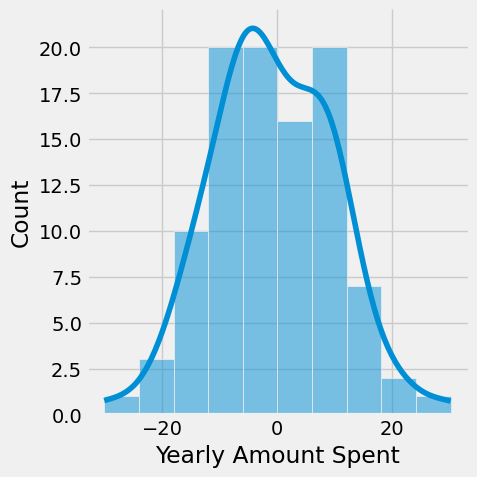

In [64]:
# visual distribution of residuals

sns.displot(residuals, kde=True)

In [ ]:
## QQplot

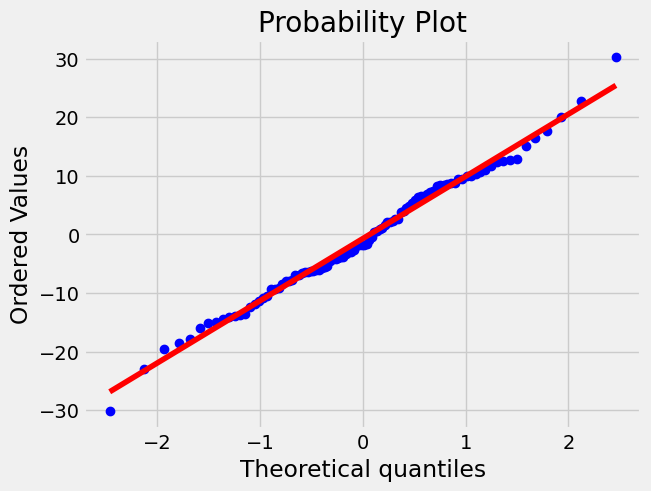

In [68]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm',plot=pylab)
pylab.show()